In [1]:
# !git clone -b master https://github.com/StefanoNasini/Country-by-country-2022-2023-international-relationships
# !cd Country-by-country-2022-2023-international-relationships

In [2]:
# After getting all four data : covote, contravote (75/90), alliance, trade
# Data will be trimmed here. 
import json
import os

root = os.path.dirname(os.getcwd())
import pandas as pd

os.chdir(os.path.join(root, "src", "utils"))
from aka import tri2name, tri2aka
os.chdir(os.path.join(root, "src"))


# cocontravotes_df_names = "covotes_over75 covotes_over90 covotes_under25 covotes_under10 contravotes_under25 contravotes_under10 contravotes_over75 contravotes_over90".split(' ')

# for df_name in cocontravotes_df_names:
#     print(f'{df_name}=pd.read_csv(os.path.join(root, "network_data", "cocontravotes", "{df_name}.csv"), index_col=0)')
    
covotes_over80 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "covotes_over80.csv"), index_col=0)
covotes_over90 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "covotes_over90.csv"), index_col=0)
covotes_under20 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "covotes_under20.csv"), index_col=0)
covotes_under10 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "covotes_under10.csv"), index_col=0)
contravotes_under20 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "contravotes_under20.csv"), index_col=0)
contravotes_under10 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "contravotes_under10.csv"), index_col=0)
contravotes_over80 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "contravotes_over80.csv"), index_col=0)
contravotes_over90 = pd.read_csv(os.path.join(root, "constructed_network", "cocontravotes", "contravotes_over90.csv"), index_col=0)

alliances = pd.read_csv(os.path.join(root, "constructed_network", "alliances.csv"), index_col=0)

trade_over80 = pd.read_csv(os.path.join(root, "constructed_network", "export_over80.csv"), index_col=0)
trade_over90 = pd.read_csv(os.path.join(root, "constructed_network", "export_over90.csv"), index_col=0)

trade_under20 = pd.read_csv(os.path.join(root, "constructed_network", "export_under20.csv"), index_col=0)
trade_under10 = pd.read_csv(os.path.join(root, "constructed_network", "export_under10.csv"), index_col=0)


trans_trade_over80 = pd.read_csv(os.path.join(root, "constructed_network",  "import_over80.csv"), index_col=0)
trans_trade_over90 = pd.read_csv(os.path.join(root, "constructed_network",  "import_over90.csv"), index_col=0)

trans_trade_under20 = pd.read_csv(os.path.join(root, "constructed_network", "import_under20.csv"), index_col=0)
trans_trade_under10 = pd.read_csv(os.path.join(root, "constructed_network", "import_under10.csv"), index_col=0)



UN_countries = covotes_over80.columns

['Y AFGHANISTAN\n', 'A ALBANIA\n', 'Y ALGERIA\n', 'A ANDORRA\n', 'Y ANGOLA\n', 'Y ANTIGUA AND BARBUDA\n', 'Y ARGENTINA\n', 'A ARMENIA\n', 'N AUSTRALIA\n', 'N AUSTRIA\n']


In [3]:
# Trim the countries
countries = set(covotes_over80.columns).intersection(set(trade_over80.columns))
countries = list(sorted(countries))
removed = set(covotes_over80.columns).difference(set(trade_over80.columns))
[tri2name[c] for c in removed]

['san marino',
 'andorra',
 'nauru',
 'marshall islands',
 'palau',
 'monaco',
 'micronesia (federated states of)',
 'south sudan',
 'liechtenstein']

In [4]:
# Trim all the dataframes
# for df_name in cocontravotes_df_names+"alliances trade_over75 trade_over90 trade_under25 trade_under10".split(' '):
#     print(f"{df_name} = {df_name}.loc[countries, countries]")

covotes_over80 = covotes_over80.loc[countries, countries]
covotes_over90 = covotes_over90.loc[countries, countries]
covotes_under20 = covotes_under20.loc[countries, countries]
covotes_under10 = covotes_under10.loc[countries, countries]
contravotes_under20 = contravotes_under20.loc[countries, countries]
contravotes_under10 = contravotes_under10.loc[countries, countries]
contravotes_over80 = contravotes_over80.loc[countries, countries]
contravotes_over90 = contravotes_over90.loc[countries, countries]
alliances = alliances.loc[countries, countries]
trade_over80 = trade_over80.loc[countries, countries]
trade_over90 = trade_over90.loc[countries, countries]
trade_under20 = trade_under20.loc[countries, countries]
trade_under10 = trade_under10.loc[countries, countries]

trans_trade_over80  = trans_trade_over80.loc[countries, countries]
trans_trade_over90  = trans_trade_over90.loc[countries, countries]
trans_trade_under20 = trans_trade_under20.loc[countries, countries]
trans_trade_under10 = trans_trade_under10.loc[countries, countries]

NameError: name 'covotes_over80' is not defined

In [5]:
# binomial method

# def get_binomial_sum(X1, X2, X3, X4, X5):
#     return X1*X2 + X1*X3 + X1*X4 + X1*X5 + X2*X3 + X2*X4 + X2*X5 + X3*X4 + X3*X5 + X4*X5

def get_binomial_disjunction(X1, X2, X3, X4, X5):
#     return get_binomial_sum(X1, X2, X3, X4, X5).applymap(lambda x:1 if x>=1 else 0)
    return ((X1+X2+X3+X4+X5)>=2)

friends80_bi = get_binomial_disjunction(covotes_over80, contravotes_under20, alliances, trade_over80, trans_trade_over80)
friends90_bi = get_binomial_disjunction(covotes_over90, contravotes_under10, alliances, trade_over90, trans_trade_over90)
enemies80_bi = get_binomial_disjunction(covotes_under20, contravotes_over80, 1-alliances, trade_under20, trans_trade_under20)
enemies90_bi = get_binomial_disjunction(covotes_under10, contravotes_over90, 1-alliances, trade_under10, trans_trade_under10)


In [6]:
for i in range(friends80_bi.shape[0]):
    friends80_bi.iloc[i, i] = False
    friends90_bi.iloc[i, i] = False
    enemies80_bi.iloc[i, i] = False
    enemies80_bi.iloc[i, i] = False
    

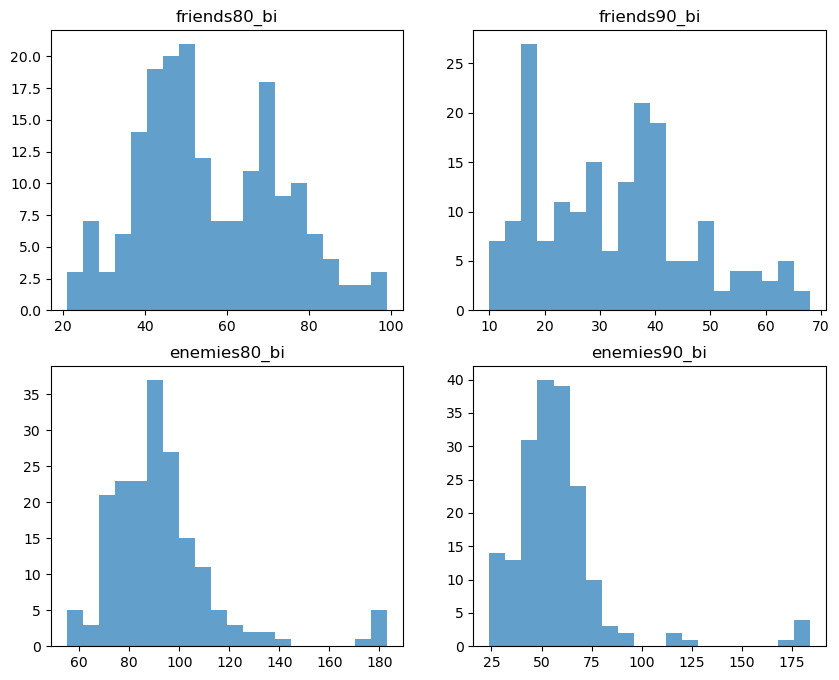

In [7]:
# how many friends does each node has
import matplotlib.pyplot as plt


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms in each subplot
axes[0, 0].hist(friends80_bi.sum(axis=1), bins=20, alpha=0.7)
axes[0, 0].set_title('friends80_bi')

axes[0, 1].hist(friends90_bi.sum(axis=1), bins=20, alpha=0.7)
axes[0, 1].set_title('friends90_bi')

axes[1, 0].hist(enemies80_bi.sum(axis=1), bins=20, alpha=0.7)
axes[1, 0].set_title('enemies80_bi')

axes[1, 1].hist(enemies90_bi.sum(axis=1), bins=20, alpha=0.7)
axes[1, 1].set_title('enemies90_bi')

plt.show()

In [8]:
# def get_trinomial_sum(X1, X2, X3, X4, X5):
#     return X1*X2*X3 + X2*X3*X4 + X3*X4*X1 + X4*X1*X2

def get_trinomial_disjunction(X1, X2, X3, X4, X5):
#     return get_trinomial_sum(X1, X2, X3, X4).applymap(lambda x:1 if x>=1 else 0)
    return ((X1+X2+X3+X4+X5)>=3)

In [9]:
friends80_tri = get_trinomial_disjunction(covotes_over80, contravotes_under20, alliances, trade_over80, trans_trade_over80)
friends90_tri = get_trinomial_disjunction(covotes_over90, contravotes_under10, alliances, trade_over90, trans_trade_over90)
enemies80_tri = get_trinomial_disjunction(covotes_under20, contravotes_over80, 1-alliances, trade_under20, trans_trade_under20)
enemies90_tri = get_trinomial_disjunction(covotes_under10, contravotes_over90, 1-alliances, trade_under10, trans_trade_under10)


In [10]:
for i in range(friends80_bi.shape[0]):
    friends80_tri.iloc[i, i] = False
    friends90_tri.iloc[i, i] = False
    enemies80_tri.iloc[i, i] = False
    enemies80_tri.iloc[i, i] = False

In [11]:
friends80_tri.sum()

AFG      0
AGO     33
ALB     17
ARE    102
ARG     20
      ... 
WSM      1
YEM      0
ZAF     31
ZMB      2
ZWE      0
Length: 184, dtype: int64

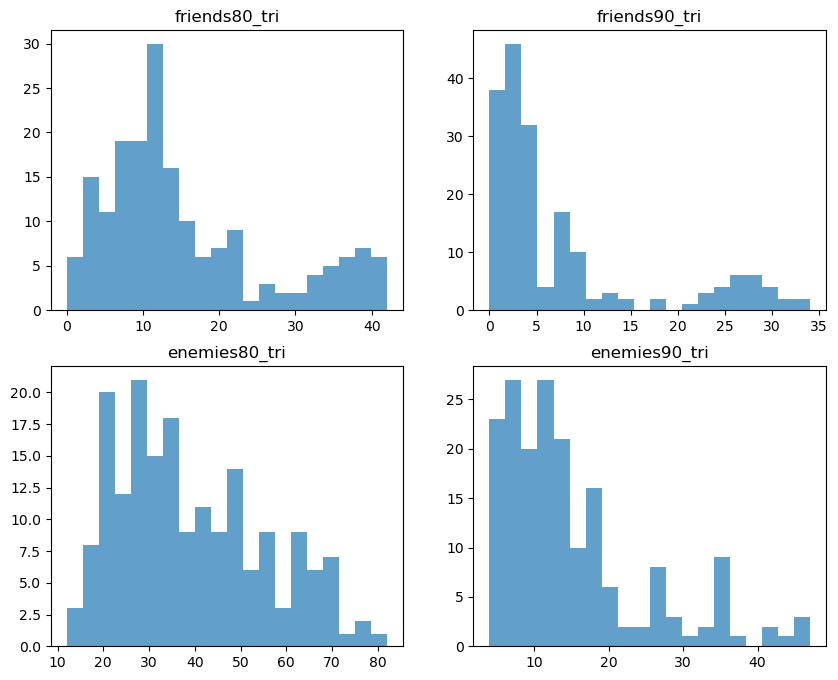

In [12]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms in each subplot
axes[0, 0].hist(friends80_tri.sum(axis=1), bins=20, alpha=0.7)
axes[0, 0].set_title('friends80_tri')

axes[0, 1].hist(friends90_tri.sum(axis=1), bins=20, alpha=0.7)
axes[0, 1].set_title('friends90_tri')

axes[1, 0].hist(enemies80_tri.sum(axis=1), bins=20, alpha=0.7)
axes[1, 0].set_title('enemies80_tri')

axes[1, 1].hist(enemies90_tri.sum(axis=1), bins=20, alpha=0.7)
axes[1, 1].set_title('enemies90_tri')

plt.show()

In [13]:
df_names = [f'{a}{b}_{c}' for c in ["bi", "tri"] for a in ["friends", "enemies"] for b in ["80", "90"] ]

In [16]:
# for df_name in df_names:
#     print(f'{df_name}.to_csv(os.path.join(root, "final_network", "{df_name}.csv"))')

os.chdir(os.path.join(root, "constructed_network"))
if "final_network" not in os.listdir():
    os.mkdir("final_network")
os.chdir(root)

friends80_bi.to_csv(os.path.join(root, "constructed_network", "final_network", "friends80_bi.csv"))
friends90_bi.to_csv(os.path.join(root, "constructed_network", "final_network", "friends90_bi.csv"))
enemies80_bi.to_csv(os.path.join(root, "constructed_network", "final_network", "enemies80_bi.csv"))
enemies90_bi.to_csv(os.path.join(root, "constructed_network", "final_network", "enemies90_bi.csv"))
friends80_tri.to_csv(os.path.join(root,"constructed_network",  "final_network", "friends80_tri.csv"))
friends90_tri.to_csv(os.path.join(root,"constructed_network",  "final_network", "friends90_tri.csv"))
enemies80_tri.to_csv(os.path.join(root,"constructed_network",  "final_network", "enemies80_tri.csv"))
enemies90_tri.to_csv(os.path.join(root,"constructed_network",  "final_network", "enemies90_tri.csv"))

In [17]:
# adjacent list generation
with open(os.path.join(root, "constructed_network", "friends90_tri_adj.txt"), 'w') as f:
    for i in range(friends90_tri.shape[0]):
        for j in range(friends90_tri.shape[1]):
            if friends90_tri.iloc[i, j] == True:
                f.write(str(i+1))
                f.write(' ')
                f.write(str(j+1))
                f.write('\n')

In [ ]:
friends90_tri.shape

In [18]:
# phi data generation
with open(os.path.join(root, "constructed_network", "phidata_network90.txt"), 'w') as f:
    for i in range(friends90_tri.shape[0]):
        for j in range(friends90_tri.shape[1]):
            if friends90_tri.iloc[i, j] == True:
                f.write("1")
            elif enemies90_tri.iloc[i, j] == True:
                f.write("2")
            else:
                f.write("0")
            f.write(" ")
        f.write('\n')

        
# phi data generation
with open(os.path.join(root, "constructed_network", "phidata_network80.txt"), 'w') as f:
    for i in range(friends80_tri.shape[0]):
        for j in range(friends80_tri.shape[1]):
            if friends80_tri.iloc[i, j] == True:
                f.write("1")
            elif enemies80_tri.iloc[i, j] == True:
                f.write("2")
            else:
                f.write("0")
            f.write(" ")
        f.write('\n')
